In [16]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Inisialisasi dan autentikasi
api = KaggleApi()
api.authenticate()

# Nama dataset yang ingin diunduh
dataset = "prajwaldongre/global-plastic-waste-2023-a-country-wise-analysis"

# Unduh dataset dan unzip ke direktori saat ini
api.dataset_download_files(dataset, path=".", unzip=True)

print("Dataset berhasil diunduh dan diekstrak di direktori saat ini.")


Dataset URL: https://www.kaggle.com/datasets/prajwaldongre/global-plastic-waste-2023-a-country-wise-analysis
Dataset berhasil diunduh dan diekstrak di direktori saat ini.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data CSV ke dalam DataFrame
data = pd.DataFrame({
    'Country': ["China", "United States", "India", "Japan", "Germany", "Brazil", "Indonesia", "Russia", "United Kingdom", "France", 
                "Mexico", "Canada", "Italy", "Turkey", "South Korea", "Spain", "Vietnam", "Thailand", "Malaysia", "Poland", 
                "Egypt", "Argentina", "Netherlands", "Australia", "Saudi Arabia", "Philippines", "Bangladesh", "Pakistan", "South Africa", "Colombia"],
    'Total_Plastic_Waste_MT': [59.08, 42.02, 26.33, 7.99, 6.28, 5.96, 5.85, 5.84, 5.03, 4.98, 
                               4.43, 3.89, 3.83, 3.21, 2.91, 2.58, 2.54, 2.41, 2.31, 2.21, 
                               2.01, 1.98, 1.78, 1.67, 1.65, 1.63, 1.61, 1.59, 1.58, 1.54],
    'Recycling_Rate': [29.8, 32.1, 11.5, 84.8, 56.1, 1.2, 11.8, 5.6, 46.2, 27.3, 
                       6.7, 9.4, 41.2, 12.1, 59.1, 37.8, 15.3, 17.6, 24.3, 34.5, 
                       6.5, 14.2, 55.9, 13.2, 4.5, 9.1, 8.4, 3.2, 18.9, 7.8],
    'Per_Capita_Waste_KG': [41.2, 127.5, 19.3, 63.2, 75.6, 28.1, 21.3, 40.2, 74.3, 73.1, 
                            34.2, 102.1, 63.4, 38.5, 56.7, 54.9, 25.8, 34.5, 70.2, 58.3, 
                            19.3, 43.5, 102.8, 64.8, 46.9, 14.8, 9.7, 7.1, 26.4, 30.1]
})

# Analisis deskriptif
desc_stats = data[['Total_Plastic_Waste_MT', 'Recycling_Rate', 'Per_Capita_Waste_KG']].describe()
desc_stats.loc['variance'] = data[['Total_Plastic_Waste_MT', 'Recycling_Rate', 'Per_Capita_Waste_KG']].var()
desc_stats.loc['mode'] = data[['Total_Plastic_Waste_MT', 'Recycling_Rate', 'Per_Capita_Waste_KG']].mode().iloc[0]

# Menampilkan tabel statistik dasar
desc_stats


,Total_Plastic_Waste_MT,Recycling_Rate,Per_Capita_Waste_KG
count,30.000000,30.000000,30.000000
mean,7.224000,23.536667,48.926667
std,12.821937,20.502035,29.154747
min,1.540000,1.200000,7.100000
25%,1.830000,8.575000,26.825000
50%,2.745000,14.750000,42.350000
75%,5.637500,33.900000,64.450000
max,59.080000,84.800000,127.500000
variance,164.402059,420.333437,849.999264
mode,1.540000,1.200000,19.300000


count: Jumlah data non-null.
mean: Rata-rata.
std: Standar deviasi.
min: Nilai minimum.
25%: Kuartil pertama (nilai di persentil ke-25).
50%: Median (atau kuartil kedua).
75%: Kuartil ketiga (nilai di persentil ke-75).
max: Nilai maksimum.


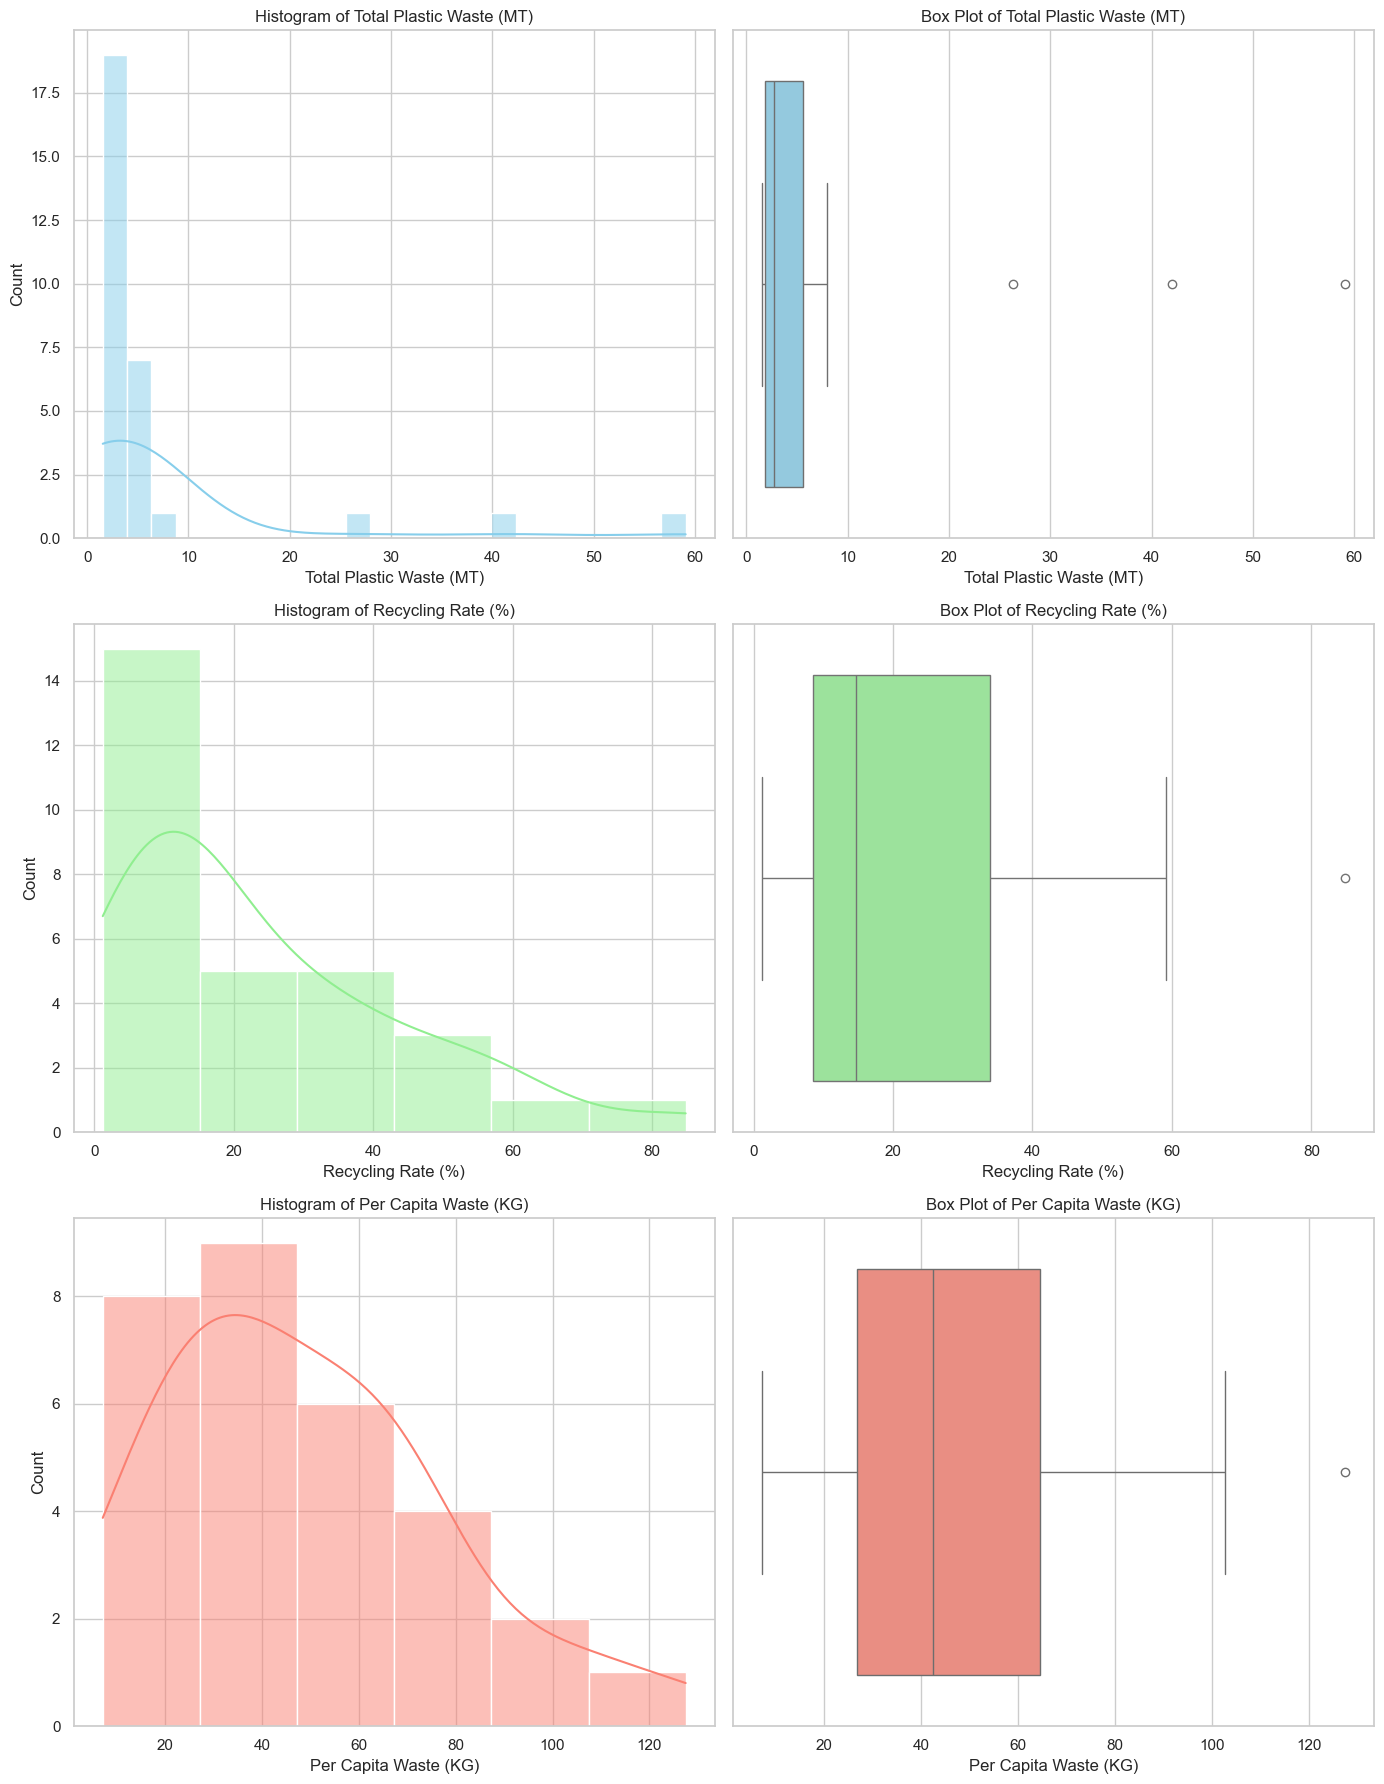

In [21]:
# Pengaturan gaya visualisasi
sns.set(style="whitegrid")

# Membuat histogram dan box plot untuk Total_Plastic_Waste_MT, Recycling_Rate, dan Per_Capita_Waste_KG
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Histogram untuk Total Plastic Waste
sns.histplot(data['Total_Plastic_Waste_MT'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Histogram of Total Plastic Waste (MT)')
axes[0, 0].set_xlabel('Total Plastic Waste (MT)')

# Boxplot untuk Total Plastic Waste
sns.boxplot(x=data['Total_Plastic_Waste_MT'], ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Box Plot of Total Plastic Waste (MT)')
axes[0, 1].set_xlabel('Total Plastic Waste (MT)')

# Histogram untuk Recycling Rate
sns.histplot(data['Recycling_Rate'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Histogram of Recycling Rate (%)')
axes[1, 0].set_xlabel('Recycling Rate (%)')

# Boxplot untuk Recycling Rate
sns.boxplot(x=data['Recycling_Rate'], ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Box Plot of Recycling Rate (%)')
axes[1, 1].set_xlabel('Recycling Rate (%)')

# Histogram untuk Per Capita Waste
sns.histplot(data['Per_Capita_Waste_KG'], kde=True, ax=axes[2, 0], color='salmon')
axes[2, 0].set_title('Histogram of Per Capita Waste (KG)')
axes[2, 0].set_xlabel('Per Capita Waste (KG)')

# Boxplot untuk Per Capita Waste
sns.boxplot(x=data['Per_Capita_Waste_KG'], ax=axes[2, 1], color='salmon')
axes[2, 1].set_title('Box Plot of Per Capita Waste (KG)')
axes[2, 1].set_xlabel('Per Capita Waste (KG)')

plt.tight_layout()
plt.show()
